# Titanic - Machine Learning from Disaster

### Overview

- Introduction
- Data Exploration
- Feature Engineering
- Modelling
- Test

# 1. Introduction

This notebook is the one I used as part of the ["Titanic-Machine Learning from Disaster"](https://www.kaggle.com/c/titanic).<br/>
The goal of the competition is to predict which passengers would survive from the Titanic disaster.<br/>
I used two datasets given by ["Kaggle"](https://www.kaggle.com/): one for training and the other for testing.<br/>
The <b>train</b> dataset contains information about 891 sample passengers out of 1503 passengers. And the <b>test</b> dataset is composed of 418 samples.<br/>
Hence, I am going to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

### Loading Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set # setting seaborn default for plots

<function seaborn.rcmod.set(*args, **kwargs)>

### Loading Datasets

In [6]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

# 2. Data Exploration

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- PassengerId: An unique passenger id
- Survived: 0 = No, 1 = Yes
- Pclass: Tick Class | 1 = 1st, 2 = 2nd, 3 = 3rd
- Name: Passenger's name with title
- Sex: Sex
- Age: Age in years
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation | C = Chebourg, Q = Queenstown, S = Southampton

### Numerical Type:
- Age
- Histogram

### Categorial Type:
- Sex, Pclass, SibSp, Parch, Embarked
- Barchart

In [4]:
train.shape

(891, 12)

The <b>train</b> dataset complosed of 891 samples with 12 columns

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'Age' and 'Cabin' values are missing for many rows.<br/>
The 'Age' value is present in 714 rows out of 891, and only 204 rows contain 'Cabin' values.

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

These are 177 rows with missing 'Age', 687 rows with missing 'Cabin' and 2 rows with missing 'Embarked' information

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Histogram for Age vs Survival

### Age vs Survival

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

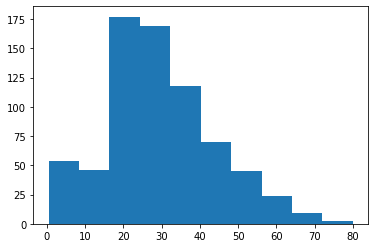

In [8]:
plt.hist(train[['Age']], bins=10)

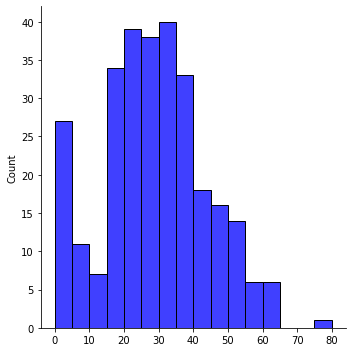

In [9]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]

sns.displot(total_survived['Age'].dropna().values, bins=range(0, 81, 5), kde=False, color='blue')

## Bar Chart for Categorical Features vs Survival

In [10]:
# Definition of Bar chart for Features vs Survival
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    not_survived = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, not_survived])
    df.index = ['Survived', 'not_survived']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

### Sex vs Survival

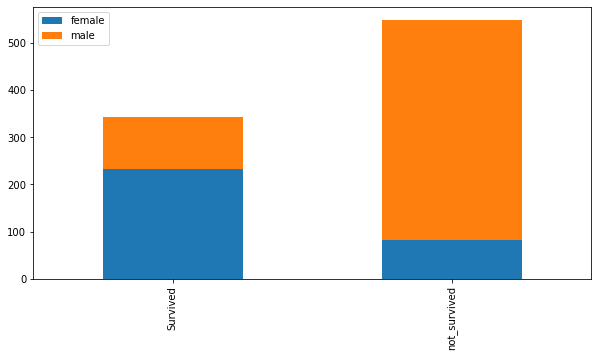

In [11]:
bar_chart('Sex')

In [12]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [13]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<b>Female</b> passengers have better survival chance than male passengers.<br/>
Most female passengers survived, but most male passengers couldn't survive.

### Pclass vs Survival

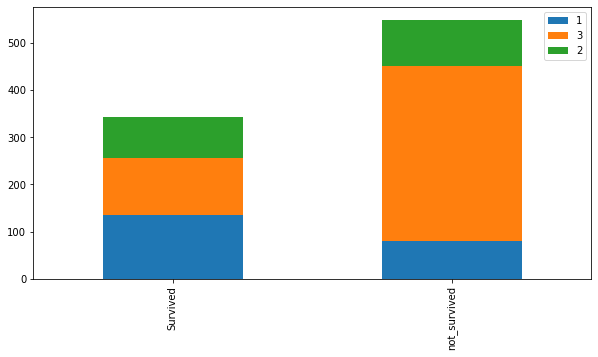

In [14]:
bar_chart('Pclass')

In [15]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Higher class passengers have higher chance for survival.<br/>
Most 3rd class passengers couldn't survive.

### SibSp vs Survival

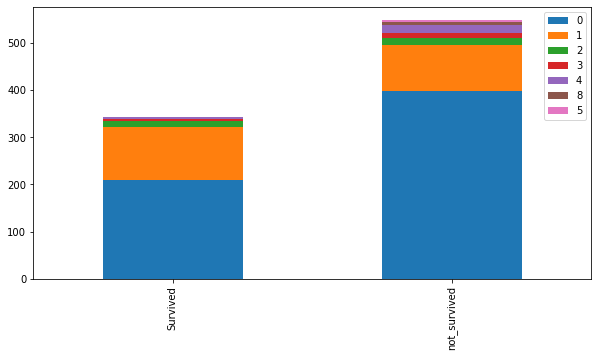

In [17]:
bar_chart('SibSp')

In [18]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [19]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

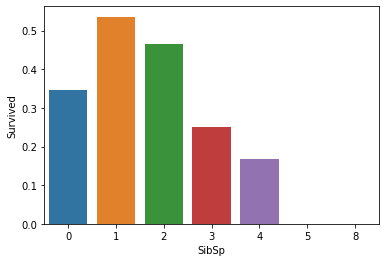

In [20]:
sns.barplot(x='SibSp', y='Survived', ci=None, data=train) # ci=None will hide the error bar

### Parch vs Survival

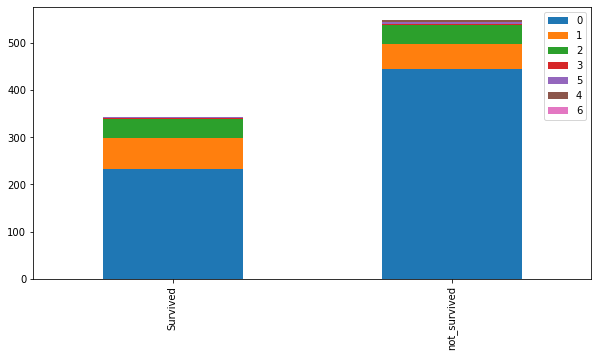

In [21]:
bar_chart('Parch')

In [22]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [23]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

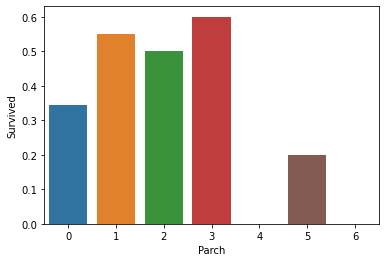

In [24]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train) # ci=None will hide the error bar

### Embarked vs Survival

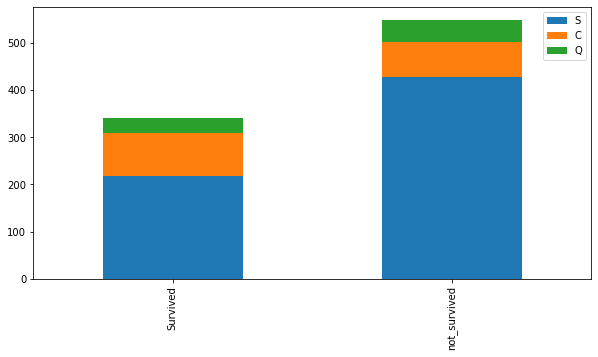

In [25]:
bar_chart('Embarked')

In [26]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [27]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


# 3. Feature Engineering

### Correlating Features

The 'PassengerId' does not affect the survival so we are going to drop the column for correlation.

<AxesSubplot:>

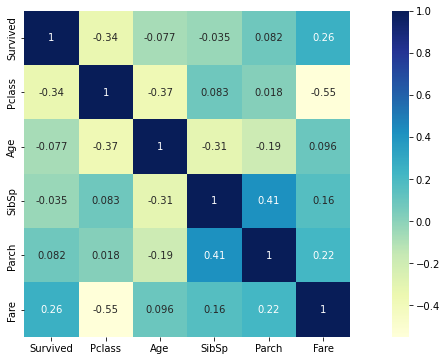

In [28]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId', axis=1).corr(), vmax=1, square=True, annot=True, cmap="YlGnBu")

<b>Feature Engineering</b> is the process of selecting, manipulating, and transforming training data into features that can be used in modelling. Then, we create new features based on existing features, and convert categorical features into numeric form.

## 3.1 Name

In [29]:
data = [train, test]

# Add a new column for titless of each name
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [30]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [31]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

### Title list
We sort the list of titles as:
- 0: Mr
- 1: Miss
- 2: Mrs
- 3: Master
- 4: Other

In [32]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady','Don', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

### Title vs Survival

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [34]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


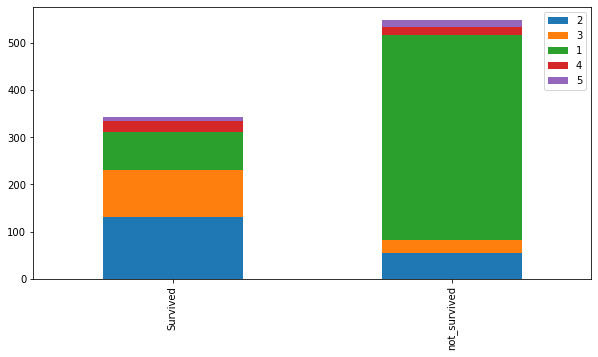

In [35]:
bar_chart('Title')

In [36]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,0.347826


We can see that "Miss" and "Mrs" have better survival chance.

## 3.2 Sex

Since 'Sex' feature is a type of categorical, we convert it into numerical type.

In [37]:
sex_mapping = {"male": 0, "female": 1}
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping).astype(int)

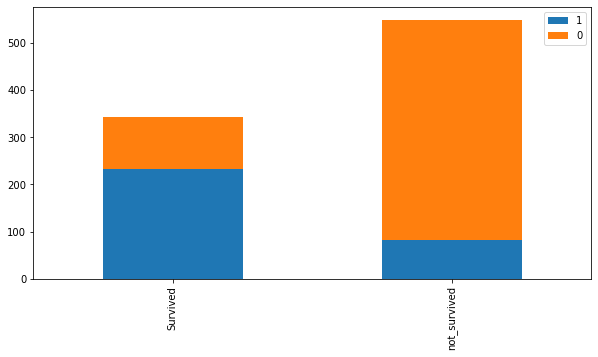

In [38]:
bar_chart('Sex')

### 3.3 Age

Some 'Age' values are missing. Hence, we fill the NULL values of 'Age' with median age for each title. </br>
Then, we sort passengers as age group
- 0: x <= 18
- 1: 18 < x <= 30
- 2: 30 < x <= 48
- 3: 48 < x <= 64
- 4: 64 < x

In [39]:
for dataset in data:
    dataset['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)

In [40]:
for dataset in data:
    dataset.loc[dataset['Age'] <= 18, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 30), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,1


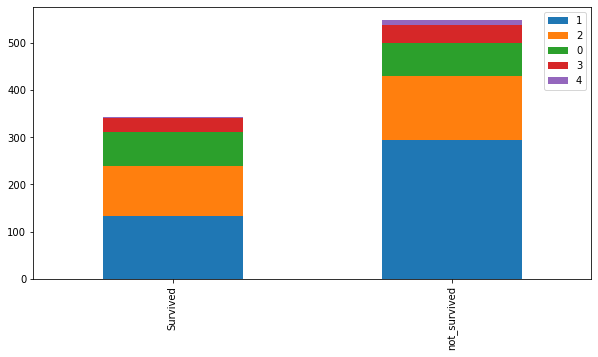

In [42]:
bar_chart('Age')

### 3.4 Embarked

There are empty values for some rows for Embarked column.

In [43]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [44]:
train['Embarked'].isnull().sum()

2

In [45]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Since majority of 'Embarked' has a value of 'S', we will fill the two empty column with 'S'

In [46]:
for dataset in data:
    dataset['Embarked'].fillna('S', inplace=True)

In [47]:
train['Embarked'].isnull().sum()

0

Now, we map 'Embarked' as:
- 0: 'S'
- 1: 'C'
- 2: 'Q'

In [48]:
embarked_mapping = { 'S': 0, 'C': 1, 'Q': 2}
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping).astype(int)

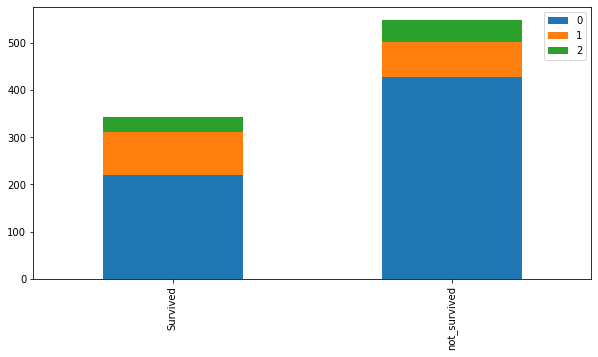

In [49]:
bar_chart('Embarked')

### 3.5 Fare

We replace missing 'Fare' values with the median of 'Fare'.

In [50]:
for dataset in data:
    dataset['Fare'].fillna(train['Fare'].median(), inplace=True)

In [51]:
train['Fare'].isnull().sum()

0

In [52]:
test['Fare'].isnull().sum()

0

Create 'FareGroup' to divide 'Fare' into 4 category range.

In [53]:
train['FareGroup'] = pd.qcut(train['Fare'], 4)
print (train[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean())

         FareGroup  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


Map 'Fare' as a 'FareGroup'
- 0: (-0.001, 7.91]
- 1: (7.91, 14.454]
- 2: (14.454, 31.0]
- 3: (31.0, 512.329]

In [54]:
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

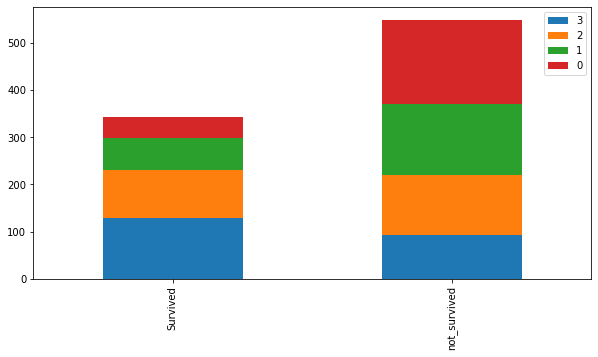

In [55]:
bar_chart('Fare')

### 3.6 Fasize

Combine 'SibSp' and 'Parch' features, and create new feature 'Fasize' which means Family Size. (It also includes oneself)

In [56]:
for dataset in data:
    dataset['Fasize'] = dataset['SibSp'] + dataset['Parch'] + 1

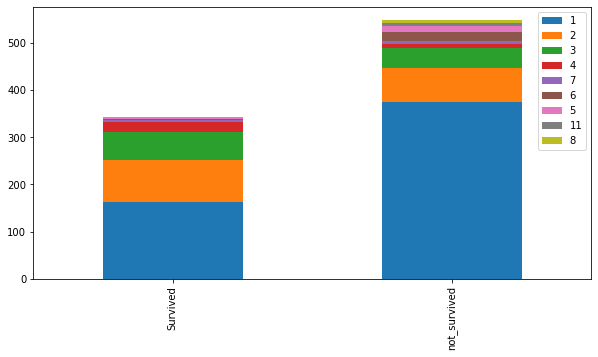

In [57]:
bar_chart('Fasize')

In [58]:
train[['Fasize', 'Survived']].groupby(['Fasize'], as_index=False).mean()

,Fasize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


We see that the 'Fasize' betweeon 0 and 4 has better chance for survival.
Travelling alone passenger, Fasize = 1, has lower survival chance. </br>
Hence, we map Fasize as:
- 0: Fasize = 1
- 1: 2 <= Fasize <= 4
- 2: Fasize > 4

In [59]:
for dataset in data:
    dataset['Member'] = 0
    dataset.loc[ dataset['Fasize'] == 1, 'Member'] = 0
    dataset.loc[ (dataset['Fasize'] > 1) & (dataset['Fasize'] <= 4), 'Member'] = 1
    dataset.loc[ dataset['Fasize'] > 4, 'Member'] = 2

In [60]:
train[['Member', 'Survived']].groupby(['Member'], as_index=False).mean()

,Member,Survived
0,0,0.303538
1,1,0.578767
2,2,0.161290


# 4. Modelling

We drop unnecessary features and then build a model.

In [61]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareGroup,Fasize,Member
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(-0.001, 7.91]",2,1


In [62]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fasize,Member
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0,NaN,2,1,1,0


In [63]:
train_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FareGroup', 'Fasize']
test_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Fasize']
train = train.drop(train_drop, axis=1)
test = test.drop(test_drop, axis=1)

train_data = train.drop('Survived', axis=1)
train_target = train['Survived']
test_data = test.drop('PassengerId', axis=1).copy()

In [64]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Member
0,0,3,0,1,0,0,1,1
1,1,1,1,2,3,1,3,1
2,1,3,1,1,1,0,2,0
3,1,1,1,2,3,0,3,1
4,0,3,0,2,1,0,1,0


In [65]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Member
0,892,3,0,2,0,2,1,0
1,893,3,1,2,0,0,3,1
2,894,2,0,3,1,2,1,0
3,895,3,0,1,1,0,1,0
4,896,3,1,1,1,0,3,1


## 4.1 Classifier Modules

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   Age       891 non-null    int32
 4   Fare      891 non-null    int32
 5   Embarked  891 non-null    int32
 6   Title     891 non-null    int64
 7   Member    891 non-null    int64
dtypes: int32(4), int64(4)
memory usage: 41.9 KB


## 4.2 Logistic Regression

This model is a regression model where the variable is categorical.

In [68]:
clf = LogisticRegression()
clf.fit(train_data, train_target)
result_log_reg = clf.predict(test_data)
accuracy_log_reg = round(clf.score(train_data, train_target) * 100, 2)
str(accuracy_log_reg) + '%'

'81.14%'

## 4.3 Support Vector Machine (SVM)

This model is a Supervised Learning model used for classification and regression analysis.

In [69]:
clf = SVC()
clf.fit(train_data, train_target)
result_svc = clf.predict(test_data)
accuracy_svc = round(clf.score(train_data, train_target) * 100, 2)
str(accuracy_svc) + '%'

'83.61%'

## 4.4 K-Nearest Neighbors
This is used for classification and regression.

In [70]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(train_data, train_target)
result_knn = clf.predict(test_data)
accuracy_knn = round(clf.score(train_data, train_target) * 100, 2)
str(accuracy_knn) + '%'

'85.3%'

## 4.5 Decision Tree

This model is a flowchart-like structure.

In [71]:
clf = DecisionTreeClassifier()
clf.fit(train_data, train_target)
result_tree = clf.predict(test_data)
accuracy_tree = round(clf.score(train_data, train_target) * 100, 2)
str(accuracy_tree) + '%'

'87.77%'

## 4.6 Random Forest
The random decision forests are an ensemble learning method for classification, regression and other tasks.

In [72]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_data, train_target)
result_forest = clf.predict(test_data)
accuracy_forest = round(clf.score(train_data, train_target) * 100, 2)
str(accuracy_forest) + '%'

'87.77%'

## 4.7 Gaussian Naive Bayes

These are a family of simple probabilistic classifiers based on applying Bayes' theorem with stron(naive) independence assumptions between the features.

In [73]:
clf = GaussianNB()
clf.fit(train_data, train_target)
result_gnb = clf.predict(test_data)
accuracy_gnb = round(clf.score(train_data, train_target) * 100, 2)
str(accuracy_gnb) + '%'

'78.0%'

# Testing
Now we get the highest accuracy score on both Decision Tree and Random Forest models.</br>
Since, Random Forest classifier limits overfitting as compared to Decision Tree, we choose Random Forest classifier to test.</br></br>

### Confusion Matrix
We test Random Forest classifier by the confusion matrix.</br>
With the confusion matrix, we can get:
- True Positive: The classifier predicted 'Survived' and the passenger actually 'Survived'.
- True Negative: The classifier predicted 'Not_Survived' and the passenger actually 'Not_Survived'.
- False Positive: The classifier predicted 'Survived' but the passenger actually 'Not_Survived'.
- False Negative: The classifier predicted 'Not_Survived' but the passenger actually 'Survived'.

<AxesSubplot:>

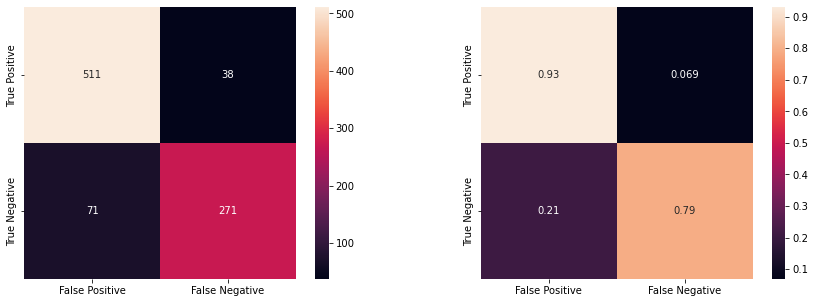

In [74]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_data, train_target)
result_forest_train = clf.predict(train_data)
accuracy_forest = round(clf.score(train_data, train_target) * 100, 2)

class_names = ['Survived', 'Not_Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(train_target, result_forest_train)
np.set_printoptions(precision=2)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                            index=['True Positive', 'True Negative'],
                            columns=['False Positive', 'False Negative'])
df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                    index=['True Positive', 'True Negative'],
                                    columns=['False Positive', 'False Negative'])

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, square=True, fmt='d')
plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True, square=True)

In [75]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Member
0,892,3,0,2,0,2,1,0
1,893,3,1,2,0,0,3,1
2,894,2,0,3,1,2,1,0
3,895,3,0,1,1,0,1,0
4,896,3,1,1,1,0,3,1


### Submission

In [76]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': result_forest
})
submission.to_csv('submission.csv', index=False)

In [77]:
submission = pd.read_csv('submission.csv')
submission.head()
submission[['Survived']].value_counts()

Survived
0           259
1           159
dtype: int64

# References

This notebook is created by learning from the following notbook:
- https://www.kaggle.com/code/chapagain/titanic-solution-a-beginner-s-guide/notebook?scriptVersionId=1473689